### **Feed Forward Neural Network from scratch for Hand-Written Digit classification using MNIST dataset**

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Providing the file path after mounting
file_path1 = '/content/drive/MyDrive/mnist_test.csv'
test_df = pd.read_csv(file_path1)

In [ ]:
print( f"No of rows: {test_df.shape[0]}")
print(f"No of columns:{test_df.shape[1]}")

No of rows: 10000
No of columns:785


In [ ]:
# Providing the file path after mounting
file_path2 = '/content/drive/MyDrive/mnist_train.csv'
train_df = pd.read_csv(file_path2)

In [ ]:
print(f"No of rows: {train_df.shape[0]}")
print(f"No of columns:{train_df.shape[1]}")

No of rows: 60000
No of columns:785


#### **Importing the required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### **Activation Functions**

In [ ]:
def relu(z):
    return np.maximum(0, z)       # ReLU activation: returns max(0, z)

In [ ]:
def relu_derivative(a):
    return (a > 0).astype(float)  # Derivative of ReLU: 1 if a > 0, else 0

In [ ]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))  # Stability trick for numerical stability(prevents overshooting of np.exp() when z is large)
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)   # Normalizing to get probabilities

#### **Dense Layer Forward Propagation**

In [ ]:
# Dense layer forward
def dense_forward(x, w, b, activation):
    z = np.dot(w, x) + b    # Linear transformation
    if activation == "relu":
        a = relu(z)         # ReLU activation
    elif activation == "softmax":
        a = softmax(z)      # Softmax activation for output layer
    else:
        raise ValueError("Unsupported activation function.")
    return z, a

#### **Data Preprocessing**

In [ ]:
# Normalizing pixel values to [0, 1]
# Adding .values converts this to a NumPy array
X_train = train_df.iloc[:, 1:].values / 255.0  # Normalizing training features
Y_train = train_df.iloc[:, 0].values           # Extracting training labels

X_test = test_df.iloc[:, 1:].values / 255.0    # Normalizing testing features
Y_test = test_df.iloc[:, 0].values             # Extracting testing labels shape = (10000 ,)

In [ ]:
# One-hot encoding of the labels
Y_train_one_hot = np.eye(10)[Y_train]         # One-hot encoding for training labels
Y_test_one_hot = np.eye(10)[Y_test]           # One-hot encoding for testing labels

#### **Hyperparameters Configuration**

##### NN Architecture:
##### Input layer has 784 neurons (MNIST dataset has 784 input features for a flattened 28x28 pixels image)
##### Hidden Layer 1 has 64 neurons
##### Hidden Layer 2 has 32 neurons
##### Output Layer has 10 neurons

In [ ]:
config = {
    "layers": [784, 64, 32, 10],   # Defining the neural network architecture
    "epochs": 100,                 # Number of full passes through the training data
    "batch_size": 20,              # Number of samples per mini-batch( Mini-batch Gradient Descent)
    "learning_rate": 0.01,         # Step size for weight updates
#     "early_stopping": True,      # Enable early stopping
#     "patience": 10               # Number of epochs with no improvement of loss function (for early stopping)
}

#### **Initializing the weights and biases**

In [ ]:
s = config["layers"]
w = {l: np.random.randn(s[l], s[l - 1]) * 0.01 for l in range(1, len(s))}  # Small random initialization for weights
b = {l: np.zeros((s[l], 1)) for l in range(1, len(s))}                     # Initialized to zeros to ensure no prior influence on activations(This simplifies computations during the early stages of training)


#### **Training Loop**
##### Performs multiple training iterations (epochs). Data is shuffled each epoch for better generalization

Epoch 10/100, Loss: 0.0312
Epoch 20/100, Loss: 0.1124
Epoch 30/100, Loss: 0.0022
Epoch 40/100, Loss: 0.0017
Epoch 50/100, Loss: 0.0065
Epoch 60/100, Loss: 0.0069
Epoch 70/100, Loss: 0.0023
Epoch 80/100, Loss: 0.0215
Epoch 90/100, Loss: 0.0034
Epoch 100/100, Loss: 0.0031
Test Accuracy: 97.34%


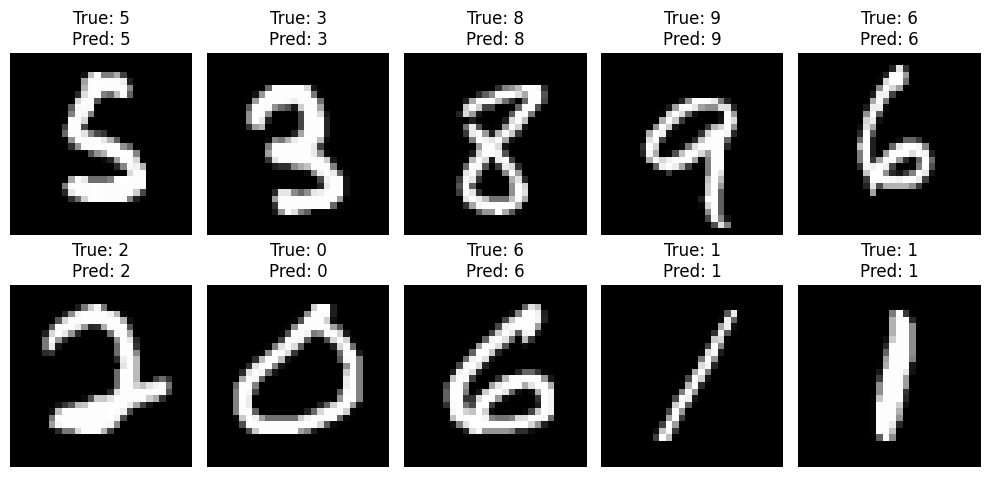

In [ ]:
best_loss = float('inf')
# patience_counter = 0

for epoch in range(config["epochs"]):

    # Shuffling training data
    shuffled_indices = np.random.permutation(X_train.shape[0])       # Shuffle indices
                                                                     # np.random.permutation(n): Generates a random permutation of integers from 0 to n-1
                                                                     # A 1D array of randomly shuffled indices of the same length as the number of training samples
    X_train_shuffled = X_train[shuffled_indices]                     # Shuffled training features
    Y_train_shuffled = Y_train_one_hot[shuffled_indices]             # Shuffled training labels

    for j in range(0, X_train.shape[0], config["batch_size"]):       # The loop goes through the dataset in steps of batch_size. If the batch size is 20, it will loop through indices 0, 20, 40, etc.
                                                                     # First batch will have from 0 to 19 ,next batch 20 to 39 and so on ....

        batch_X = X_train_shuffled[j:j + config["batch_size"], :].T  # Extracting mini-batch features
        batch_Y = Y_train_shuffled[j:j + config["batch_size"], :].T  # Extracting mini-batch labels

        # Forward propagation
        a = {0: batch_X}                                             # Input layer activations( The input to the network is the entire mini-batch)
        z = {}                                                       # Dictionary to store z values for each layer

        for l in range(1, len(s)):
            activation = "softmax" if l == len(s) - 1 else "relu"         # Using Softmax for output layer and ReLU for hidden layers
            z[l], a[l] = dense_forward(a[l - 1], w[l], b[l], activation)  # Computing z and activation


        # Backward propagation
        delta = {len(s)-1 : a[len(s) - 1] - batch_Y}                      # Error (delta) for each sample in the mini-batch at the output layer
        dw = {}  # Gradients for weights
        db = {}  # Gradients for biases
        for l in range(len(s) - 1, 0, -1): # Looping backward through layers
            dw[l] = np.dot(delta[l], a[l - 1].T) / config["batch_size"]              # Gradient of weights
            db[l] = np.sum(delta[l], axis=1, keepdims=True) / config["batch_size"]   # Gradient of biases

            if l > 1:  # For hidden layers
                delta[l - 1] = np.dot(w[l].T, delta[l]) * relu_derivative(a[l - 1])  # Backpropagate error


        # Updating weights and biases
        for l in range(1, len(s)):
            w[l] -= config["learning_rate"] * dw[l]  # Updating weights
            b[l] -= config["learning_rate"] * db[l]  # Updating biases

    # Computing loss every 10 epochs
    y_hat = a[len(s) - 1]                                            # Output layer predictions
    loss = -np.mean(np.sum(batch_Y * np.log(y_hat + 1e-8), axis=0))  # Cross-entropy loss
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{config['epochs']}, Loss: {loss:.4f}")

    # # Early stopping check
    # if config["early_stopping"]:
    #     if loss < best_loss:
    #         best_loss = loss
    #         patience_counter = 0
    #     else:
    #         patience_counter += 1
    #     if patience_counter >= config["patience"]:
    #         print(f"Early stopping at epoch {epoch + 1}.")
    #         break


# Prediction function
def predict(X, w, b, s):
    a = X  # Input features
    for l in range(1, len(s)):
        activation = "softmax" if l == len(s) - 1 else "relu"  # Softmax for output, ReLU for hidden layers
        _, a = dense_forward(a, w[l], b[l], activation)        # Computing activations
    return np.argmax(a, axis=0)                                # Returning predicted class labels


# Evaluating the model
test_predictions = predict(X_test.T, w, b, s)         # Predicting on test set
accuracy = np.mean(test_predictions == Y_test) * 100  # Computing accuracy
print(f"Test Accuracy: {accuracy:.2f}%")

# Displaying sample predictions vs actual labels with images
sample_indices = np.random.choice(X_test.shape[0], 10, replace=False)
plt.figure(figsize=(10, 5))
for i, idx in enumerate(sample_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {Y_test[idx]}\nPred: {test_predictions[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
pip install tabulate

In [ ]:
from tabulate import tabulate

# Layer sizes
input_size = 784  # Number of features in the input
hidden_layer1_size = 64
hidden_layer2_size = 32
output_size = 10  # Number of output classes

# Initializing layer dimensions for each layer
layer_sizes = [input_size, hidden_layer1_size, hidden_layer2_size, output_size]

# Preparing data for the table
data = []

# Input layer
data.append(["Input Layer", "-", "-", f"({input_size}, 20)", "-", "-"])

# Hidden Layer 1
data.append([f"Hidden Layer 1", f"({hidden_layer1_size}, {input_size})", f"({hidden_layer1_size}, 1)", f"({input_size}, 20)", f"({hidden_layer1_size}, 20)", f"({hidden_layer1_size}, 20)"])

# Hidden Layer 2
data.append([f"Hidden Layer 2", f"({hidden_layer2_size}, {hidden_layer1_size})", f"({hidden_layer2_size}, 1)", f"({hidden_layer1_size}, 20)", f"({hidden_layer2_size}, 20)", f"({hidden_layer2_size}, 20)"])

# Output Layer
data.append([f"Output Layer", f"({output_size}, {hidden_layer2_size})", f"({output_size}, 1)", f"({hidden_layer2_size}, 20)", f"({output_size}, 20)", f"({output_size}, 20)"])

# Creating the table with borders and lines
table = tabulate(data, headers=["Layer", "W[l] Shape", "b[l] Shape", "a[l-1] Shape", "z[l] Shape", "a[l] Shape"], tablefmt="grid")

# Displaying the table
print(table)


+----------------+--------------+--------------+----------------+--------------+--------------+
| Layer          | W[l] Shape   | b[l] Shape   | a[l-1] Shape   | z[l] Shape   | a[l] Shape   |
+================+==============+==============+================+==============+==============+
| Input Layer    | -            | -            | (784, 20)      | -            | -            |
+----------------+--------------+--------------+----------------+--------------+--------------+
| Hidden Layer 1 | (64, 784)    | (64, 1)      | (784, 20)      | (64, 20)     | (64, 20)     |
+----------------+--------------+--------------+----------------+--------------+--------------+
| Hidden Layer 2 | (32, 64)     | (32, 1)      | (64, 20)       | (32, 20)     | (32, 20)     |
+----------------+--------------+--------------+----------------+--------------+--------------+
| Output Layer   | (10, 32)     | (10, 1)      | (32, 20)       | (10, 20)     | (10, 20)     |
+----------------+--------------+-------